In [2]:
import numpy as np
import pandas as pd
import datetime


In [77]:
df = pd.read_csv("russia_losses_equipment.csv") # Equipment data
df1 = pd.read_csv("russia_losses_personnel.csv") # Personnel data

eq = df[[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']] # Equipments

df["Total"] = eq.sum(axis=1) # Total Equipment loss

# Merging the datasets into one dataframe
df['personnel'] = df1['personnel']
df['POW'] = df1['POW']
df
df['personnel loss per day'] = df['personnel'].diff() 
df['equipment loss per day'] = df['Total'].diff()
df.loc[(df['personnel loss per day'].isnull()),
       'personnel loss per day'] = df.loc[(df['personnel loss per day'].isnull()), 'personnel']
df.loc[(df['equipment loss per day'].isnull()), 
       'equipment loss per day'] = df.loc[(df['equipment loss per day'].isnull()), 'Total']
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].apply(lambda x: x.strftime('%A'))
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,Total,personnel,POW,personnel loss per day,equipment loss per day,day_of_week
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN,828.0,2800,0,2800.0,828.0,Friday
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN,1152.0,4300,0,1500.0,324.0,Saturday
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN,1157.0,4500,0,200.0,5.0,Sunday
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN,1480.0,5300,0,800.0,323.0,Monday
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN,1580.0,5710,200,410.0,100.0,Tuesday


In [78]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f):
    
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=False, figsize=(10, 8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        
        # First Graph - day vs total equipment
        
        ax1.bar(df[plot1_f1], df[plot1_f2],color = 'darkorange')

        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2+" Loss")
        ax1.set_title(plot1_f1+" vs "+plot1_f2+" Loss")

        # Second Graph - day vs personnel loss
    
        ax2.plot(df[plot1_f1], df[plot2_f],color='red')
        ax2.legend(labels=[plot2_f])

        ax2.set_xlabel(plot1_f1)
        ax2.set_ylabel(plot2_f)
        ax2.set_title(plot1_f1+" vs "+plot2_f)

        # Third Graph - Histogram
        
        ax3.hist(df[plot3_f],color='skyblue')
    
        ax3.set_xlabel(plot3_f)
        ax3.set_ylabel("Count")
        ax3.set_title("Histogram of "+ plot3_f)
        
        plt.close(fig)
        return fig

Column
    [0] Row(align='center')
        [0] TextInput(name='plot1_f1', value='day')
        [1] Select(name='plot1_f2', options=['Total', 'aircraft', ...], value='Total')
    [1] Row(align='center')
        [0] Select(name='plot2_f', options=['personnel', 'POW'], value='personnel')
        [1] Select(name='plot3_f', options=['personnel loss per day',...], value='personnel loss per day')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00101')
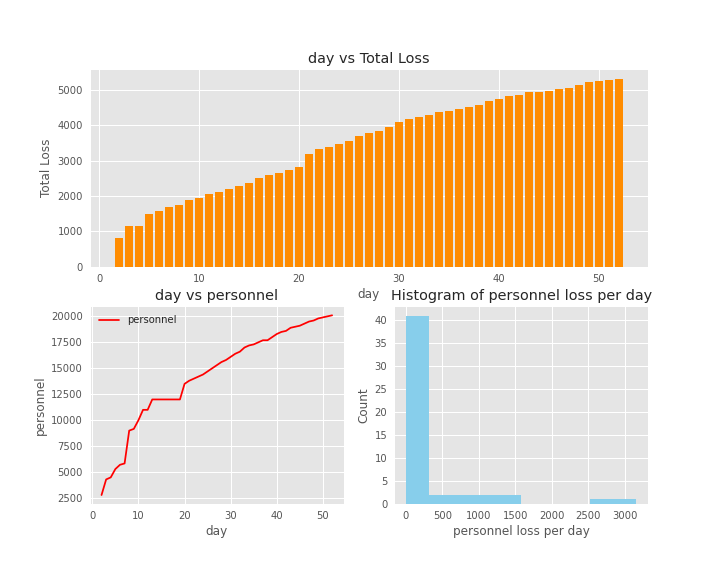

In [79]:
import panel as pn
pn.extension()

kw = dict(plot1_f1="day",
          plot1_f2=[ 'Total','aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
          plot2_f=['personnel', 'POW'],
          plot3_f=['personnel loss per day', 'equipment loss per day'])

dash1 = pn.interact(create_figure, **kw)

dash1 = pn.Column(
                    pn.Row(dash1[0][0],dash1[0][1], align="center"),
                    pn.Row(dash1[0][2],dash1[0][3], align="center"),
                    dash1[1]
                 )
dash1